# Classify whether application accepted or not using Logistic regression

card
Factor. Was the application for a credit card accepted?

reports
Number of major derogatory reports.

age
Age in years plus twelfths of a year.

income
Yearly income (in USD 10,000).

share
Ratio of monthly credit card expenditure to yearly income.

expenditure
Average monthly credit card expenditure.

owner
Factor. Does the individual own their home?

selfemp
Factor. Is the individual self-employed?

dependents
Number of dependents.

months
Months living at current address.

majorcards
Number of major credit cards held.

active
Number of active credit accounts.

In [1]:
import pandas as pd 
import numpy  as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [2]:
#Importing Data
credit = pd.read_csv("C:\\Excelr Data\\Assignments\\Logestic Regression\\creditcard.csv")

In [3]:
credit

,Unnamed: 0,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1315,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,1316,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,1317,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,1318,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [4]:

credit.drop(["Unnamed: 0"],axis=1,inplace=True)

In [5]:
credit

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [6]:
credit.dtypes

card            object
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [7]:
#from sklearn.preprocessing import LabelEncoder
#enc = LabelEncoder()
#enc.fit(credit['owner'])
#credit['owner'] = enc.transform(credit['owner'])

In [54]:
#enc.fit(credit['selfemp'])
#credit['selfemp'] = enc.transform(credit['selfemp'])

In [55]:
#enc.fit(credit['card'])
#credit['card'] = enc.transform(credit['card'])

In [56]:
credit.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [57]:
credit.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [58]:

credit['selfemp'] = credit['selfemp'].apply(lambda x: 0 if x=='no' else 1)
credit['card'] = credit['card'].apply(lambda x: 0 if x=='no' else 1)
credit['owner'] = credit['owner'].apply(lambda x: 0 if x=='no' else 1)
credit

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1,0,33.58333,4.5660,0.002146,7.333333,1,0,0,94,1,19
1315,0,5,23.91667,3.1920,0.000376,0.000000,0,0,3,12,1,5
1316,1,0,40.58333,4.6000,0.026513,101.298300,1,0,2,1,1,2
1317,1,0,32.83333,3.7000,0.008999,26.996670,0,1,0,60,1,7


In [59]:
credit.corr()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
card,1.000000,-0.452577,0.000537,0.094308,0.388028,0.365814,0.147826,-0.054340,-0.036126,-0.000268,0.107769,0.080464
reports,-0.452577,1.000000,0.044089,0.011023,-0.159011,-0.136538,-0.053570,0.018835,0.019731,0.048968,-0.007304,0.207755
age,0.000537,0.044089,1.000000,0.324653,-0.115697,0.014948,0.367749,0.100421,0.212146,0.436426,0.009777,0.181070
income,0.094308,0.011023,0.324653,1.000000,-0.054429,0.281104,0.324776,0.112294,0.317601,0.130346,0.107138,0.180540
share,0.388028,-0.159011,-0.115697,-0.054429,1.000000,0.838779,-0.015764,-0.078905,-0.082618,-0.055348,0.051470,-0.023474
expenditure,0.365814,-0.136538,0.014948,0.281104,0.838779,1.000000,0.093180,-0.035638,0.052664,-0.029007,0.077514,0.054724
owner,0.147826,-0.053570,0.367749,0.324776,-0.015764,0.093180,1.000000,0.041673,0.309190,0.238652,0.063851,0.274924
selfemp,-0.054340,0.018835,0.100421,0.112294,-0.078905,-0.035638,0.041673,1.000000,0.042096,0.065912,0.004854,0.029555
dependents,-0.036126,0.019731,0.212146,0.317601,-0.082618,0.052664,0.309190,0.042096,1.000000,0.046512,0.010285,0.107133
months,-0.000268,0.048968,0.436426,0.130346,-0.055348,-0.029007,0.238652,0.065912,0.046512,1.000000,-0.041447,0.100028


In [60]:
credit.isna().sum() 

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [61]:
# Checking if we have na values or not 
credit.isnull().sum() # No null values
credit.isnull().any().sum()


0

In [73]:
X = credit.iloc[:,1:]
Y = credit.iloc[:,0]

In [74]:
X

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,y_pred
0,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12,1
1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13,1
2,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5,1
3,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7,1
4,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,0,33.58333,4.5660,0.002146,7.333333,1,0,0,94,1,19,1
1315,5,23.91667,3.1920,0.000376,0.000000,0,0,3,12,1,5,0
1316,0,40.58333,4.6000,0.026513,101.298300,1,0,2,1,1,2,1
1317,0,32.83333,3.7000,0.008999,26.996670,0,1,0,60,1,7,1


In [75]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
1314    1
1315    0
1316    1
1317    1
1318    1
Name: card, Length: 1319, dtype: int64

In [76]:
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\deshp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
classifier.coef_

array([[-1.64506335e+00,  1.85319131e-02, -9.82530945e-02,
        -1.11259113e-03,  1.61016250e+00,  4.19490662e-01,
         3.41362662e-01, -6.83509108e-01, -2.73128091e-03,
         4.02614516e-01,  7.49462052e-02,  2.67878707e-01]])

In [78]:
classifier.predict_proba(X)

array([[0.00000000e+00, 1.00000000e+00],
       [1.71217108e-06, 9.99998288e-01],
       [1.33065892e-09, 9.99999999e-01],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

In [79]:
y_pred = classifier.predict(X)

In [80]:
credit['y_pred'] =y_pred

In [81]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))


In [82]:
credit_new = pd.concat([credit,y_prob],axis =1)
credit_new

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,y_pred,0,1
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12,1,0.000000e+00,1.000000
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13,1,1.712171e-06,0.999998
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5,1,1.330659e-09,1.000000
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7,1,0.000000e+00,1.000000
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5,1,0.000000e+00,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1,0,33.58333,4.5660,0.002146,7.333333,1,0,0,94,1,19,1,7.733493e-06,0.999992
1315,0,5,23.91667,3.1920,0.000376,0.000000,0,0,3,12,1,5,0,9.999930e-01,0.000007
1316,1,0,40.58333,4.6000,0.026513,101.298300,1,0,2,1,1,2,1,0.000000e+00,1.000000
1317,1,0,32.83333,3.7000,0.008999,26.996670,0,1,0,60,1,7,1,0.000000e+00,1.000000


In [83]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y,y_pred)

In [84]:
accuracy = sum(Y==y_pred)/credit.shape[0]

In [85]:
pd.crosstab(Y,y_pred)

col_0,0,1
card,,
0,295,1
1,23,1000


In [86]:
# filling all the cells with zeroes
credit_new["Att_val"] = 0
credit_new

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,y_pred,0,1,Att_val
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12,1,0.000000e+00,1.000000,0
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13,1,1.712171e-06,0.999998,0
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5,1,1.330659e-09,1.000000,0
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7,1,0.000000e+00,1.000000,0
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5,1,0.000000e+00,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1,0,33.58333,4.5660,0.002146,7.333333,1,0,0,94,1,19,1,7.733493e-06,0.999992,0
1315,0,5,23.91667,3.1920,0.000376,0.000000,0,0,3,12,1,5,0,9.999930e-01,0.000007,0
1316,1,0,40.58333,4.6000,0.026513,101.298300,1,0,2,1,1,2,1,0.000000e+00,1.000000,0
1317,1,0,32.83333,3.7000,0.008999,26.996670,0,1,0,60,1,7,1,0.000000e+00,1.000000,0


In [87]:
# taking threshold value as 0.5 and above the prob value will be treated as correct value 
credit_new.loc[y_pred>=0.5,"Att_val"] = 1
credit_new.Att_val

0       1
1       1
2       1
3       1
4       1
       ..
1314    1
1315    0
1316    1
1317    1
1318    1
Name: Att_val, Length: 1319, dtype: int64

In [90]:
from sklearn.metrics import classification_report
classification_report(credit_new.Att_val,credit_new.y_pred)
#classificaion report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       318\n           1       1.00      1.00      1.00      1001\n\n    accuracy                           1.00      1319\n   macro avg       1.00      1.00      1.00      1319\nweighted avg       1.00      1.00      1.00      1319\n'

In [92]:
# confusion matrix 
confusion_matrix = pd.crosstab(credit_new['Att_val'],credit.card)
confusion_matrix

card,0,1
Att_val,,
0,295,23
1,1,1000


In [93]:
accuracy = (295+1000)/(295+1000+1+23)
accuracy

0.9818043972706596

In [95]:
precision = 1000/(1+1000)
precision

0.999000999000999

In [96]:
recall = 1000/(1000+23)
recall

0.9775171065493646

In [97]:
f1_score = 2*(precision*recall/(precision+recall))
f1_score

0.9881422924901186

In [99]:
# ROC curve 
from sklearn import metrics
# fpr => false positive rate
# tpr => true positive rate
fpr, tpr, threshold = metrics.roc_curve(credit.card,y_pred)


Text(0, 0.5, 'True Positive')

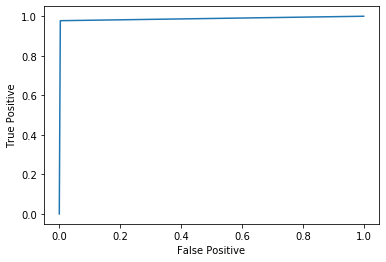

In [100]:
# the above function is applicable for binary classification class 

plt.plot(fpr,tpr);plt.xlabel("False Positive");plt.ylabel("True Positive")
 

In [102]:
roc_auc = metrics.auc(fpr, tpr) # area under ROC curve 
roc_auc 

0.9870693640854931